In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers

2024-04-09 09:55:36.716240: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-04-09 09:55:36.716537: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-04-09 09:55:36.802548: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-04-09 09:55:37.021417: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-04-09 09:55:38.159004: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF

Loading Dataset

In [11]:
(X_train,Y_train),(X_test,Y_test) = tf.keras.datasets.mnist.load_data()

print(X_train.type)
print(Y_train.shape)

numpy.ndarray

Normalising the Dataset

In [20]:
# X_train = tf.keras.utils.normalize(X_train,axis=1)
# X_test = tf.keras.utils.normalize(X_test,axis=1)

X_train = X_train/255

X_test = X_test/255

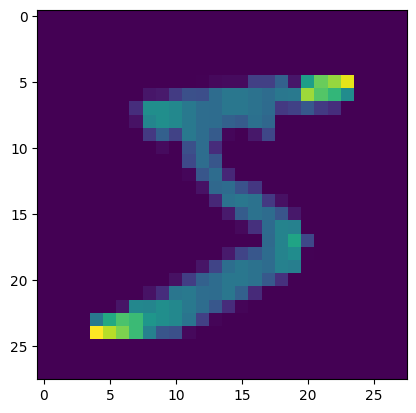

In [21]:
plt.imshow(X_train[0])

Let's call the model and add pre-defined layers

In [22]:
model = tf.keras.models.Sequential()

model.add(tf.keras.layers.Flatten(input_shape=(28, 28)))
model.add(tf.keras.layers.Dense(128, activation='relu'))
model.add(tf.keras.layers.Dense(128, activation='relu'))
model.add(tf.keras.layers.Dense(10, activation='softmax'))

model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_4 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_16 (Dense)                │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_18 (Dense)                │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 118,282 (462.04 KB)

 Trainable params: 118,282 (462.04 KB)

 Non-trainable params: 0 (0.00 B)

Model2 with more hidden layers

In [23]:
model2 = tf.keras.models.Sequential()

model2.add(tf.keras.layers.Flatten(input_shape=(28, 28)))
model2.add(tf.keras.layers.Dense(128, activation='relu'))
model2.add(tf.keras.layers.Dense(128, activation='relu'))
model2.add(tf.keras.layers.Dense(128, activation='relu'))
model2.add(tf.keras.layers.Dense(128, activation='relu'))
model2.add(tf.keras.layers.Dense(10, activation='softmax'))

Now. Let's compile the model

In [24]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
model2.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

Let's train the Model

In [25]:
model.fit(X_train,Y_train,epochs=5,batch_size=64)

Epoch 1/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.4308 - loss: 1.7123
Epoch 2/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8127 - loss: 0.6259
Epoch 3/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8562 - loss: 0.4830
Epoch 4/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8785 - loss: 0.4235
Epoch 5/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8860 - loss: 0.3881


In [26]:
model2.fit(X_train,Y_train,epochs=3,batch_size=64)

Epoch 1/3
938/938 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.4467 - loss: 1.4945
Epoch 2/3
938/938 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8200 - loss: 0.5912
Epoch 3/3
938/938 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8626 - loss: 0.4587


Computing Accuracy, Precision, Recall and F1-score

In [27]:
from sklearn.metrics import accuracy_score,f1_score,recall_score,precision_score

y_prob = model.predict(X_test)
# ?Here y_prob has shape (60000,10)

y_pred = np.argmax(y_prob,axis=1)

acc = accuracy_score(y_pred,Y_test);
f1 = f1_score(Y_test, y_pred, average='weighted')
recall = recall_score(Y_test, y_pred, average='weighted')
precision = precision_score(Y_test, y_pred, average='weighted')

print("Accuracy:", acc)
print("F1 Score:", f1)
print("Recall:", recall)
print("Precision:", precision)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
Accuracy: 0.8984
F1 Score: 0.8979906724326698
Recall: 0.8984
Precision: 0.8982567781022506


Computing accuracy,precision,recall,f1_score for model2

In [28]:
y_prob = model2.predict(X_test)

y_pred = np.argmax(y_prob,axis=1)

acc = accuracy_score(y_pred,Y_test);
f1 = f1_score(Y_test, y_pred, average='weighted')
recall = recall_score(Y_test, y_pred, average='weighted')
precision = precision_score(Y_test, y_pred, average='weighted',zero_division=1)

print("Accuracy:", acc)
print("F1 Score:", f1)
print("Recall:", recall)
print("Precision:", precision)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
Accuracy: 0.8849
F1 Score: 0.8840815330340313
Recall: 0.8849
Precision: 0.8852777146620728


Evaluation model for testing dataset

In [29]:
loss,accuracy = model.evaluate(X_test,Y_test)
print(loss)
print(accuracy)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8859 - loss: 0.4023
0.3592309057712555
0.8984000086784363
